In [20]:
# %reset
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from display_network import *

mndata = MNIST('../MNIST/')
mndata.load_training()
X = np.asarray(mndata.train_images)
y = np.array(mndata.train_labels.tolist())


def extract_data(X, y, classes):
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example: 
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label 
            (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([])
    for i in cls[0]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n0 = len(y_res_id)

    for i in cls[1]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n1 = len(y_res_id) - n0 
    y_res_id = y_res_id.astype(int)
    X_res = X[y_res_id, :]
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)

cls = [[0], [6]]
(X_train, y_train) = extract_data(X, y, cls)


print(X_train.shape, type(X_train))

from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

mndata.load_testing()
Xtest_all = np.asarray(mndata.test_images)
ytest_all = np.array(mndata.test_labels.tolist())
(X_test, y_test) = extract_data(Xtest_all, ytest_all, cls)

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print "Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred.tolist()))

mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]
print(Xmis.shape)



((11841, 784), <type 'numpy.ndarray'>)
Accuracy: 98.66 %
(26, 784)


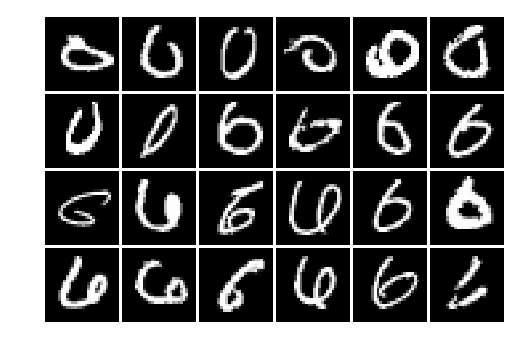

In [21]:
plt.axis('off')
A = display_network(Xmis.T)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

In [16]:
# prob 
print(logreg.predict_proba(Xmis))
print(y_test[:10])

[[  1.12468670e-05   9.99988753e-01]
 [  7.33055210e-08   9.99999927e-01]
 [  2.53644643e-01   7.46355357e-01]
 [  9.99976153e-01   2.38470532e-05]
 [  9.91519985e-01   8.48001460e-03]
 [  9.84886524e-01   1.51134762e-02]
 [  7.28444682e-01   2.71555318e-01]
 [  5.50593340e-01   4.49406660e-01]
 [  5.64877520e-01   4.35122480e-01]
 [  5.29309456e-01   4.70690544e-01]
 [  9.98779568e-01   1.22043154e-03]
 [  7.54343017e-01   2.45656983e-01]
 [  9.99998718e-01   1.28185821e-06]]
[0 0 0 0 0 0 0 0 0 0]
